출처 : https://www.kaggle.com/code/abdulbasitniazi/resnet50fromscratch-eda

### 0. 산책하기

In [1]:
import os
for dirname, _, filenames in os.walk('./dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./dataset/cane\OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg
./dataset/cane\OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg
./dataset/cane\OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg
./dataset/cane\OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg
./dataset/cane\OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg
./dataset/cane\OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg
./dataset/cane\OIP--0C2kq6I68beB3DduLoxMgHaEf.jpeg
./dataset/cane\OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg
./dataset/cane\OIP--1QXriWyOTJg-9fEwbznmgHaI4.jpeg
./dataset/cane\OIP--2uTtzjaszBfEMCROuLN3wHaLH.jpeg
./dataset/cane\OIP--2z_zAuTMzgYM_KynUl9CQHaE7.jpeg
./dataset/cane\OIP--565fkAJy3DoFs81C9uE1QHaEY.jpeg
./dataset/cane\OIP--6mVvk2SFEi7TxqtyMbdvgHaEK.jpeg
./dataset/cane\OIP--6UY_QQC69uZF4CrwEcfUQHaHa.jpeg
./dataset/cane\OIP--7xBAVJkrjDLNCknR2fuKgHaHa.jpeg
./dataset/cane\OIP--8oCad9Nr69Ol4YEkvXJFQHaNK.jpeg
./dataset/cane\OIP--90_fw5Y28UC44KVSPuxdAHaJ3.jpeg
./dataset/cane\OIP--9pxEn5HUPsqA38ao3O7TgHaGV.jpeg
./dataset/cane\OIP--AzXmxzRD9y3THnVByTtLwHaG5.jpeg
./dataset/cane\OIP--BKXxWj6jk2y8_PQ

# 1. Import

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
import tensorflow as tf
import splitfolders 
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import itertools
import plotly.express as px
#Suppressing Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

# 2. 데이터 확인

## 2.1 경로 설정

In [3]:
data_dir = "./dataset/"
data_dir = pathlib.Path(data_dir)

In [4]:
total_images_glob = glob.glob(os.path.join(data_dir, '*/*.jpeg'))
print("Total Number of Images", len(total_images_glob))
total_images_series = pd.Series(total_images_glob)

Total Number of Images 24209


## 2.2 DF 생성

In [5]:
total_images_series.head()

0        dataset\cane\OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg
1    dataset\cane\OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg
2    dataset\cane\OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg
3    dataset\cane\OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg
4    dataset\cane\OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg
dtype: object

In [6]:
all_df = pd.DataFrame()
all_df['FileName'] = total_images_series.map(lambda imageName :imageName.split("\\")[-1])
all_df['ClassId'] = total_images_series.map(lambda imageName :imageName.split("\\")[-2])
all_df.tail()

FileName     ClassId
24204  OIP-_U7JiIoYjbWPqmmmmdsvJwHaF5.jpeg  scoiattolo
24205  OIP-_VBkNQd_MZI4xoemUb-FtAHaE7.jpeg  scoiattolo
24206  OIP-_WyHKgREia-4VijlL6DNswHaFj.jpeg  scoiattolo
24207  OIP-_xFGMN0UbYduHdiXQ1maZAHaIF.jpeg  scoiattolo
24208  OIP-_XkUFCI2duAyKDD9utKQzgHaFc.jpeg  scoiattolo

In [7]:
cls_cnt = all_df['ClassId'].value_counts()
cls_cnt.head(10)

cane          4863
ragno         4497
gallina       3098
cavallo       2623
mucca         1866
scoiattolo    1862
farfalla      1650
pecora        1444
gatto         1227
elefante      1079
Name: ClassId, dtype: int64

## 2.3 plt로 데이터 확인

In [8]:
fig = go.Figure(go.Bar(
            x= cls_cnt.values,
            y= cls_cnt.index,
            orientation='h'))

fig.update_layout(title='Data Distribution in Bars',font_size=15,title_x=0.45)

fig.show()

In [9]:
fig=px.pie(cls_cnt.head(10),values= 'ClassId', names=all_df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Data',font_size=15,title_x=0.45,annotations=[dict(text='Animas-10',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

# 3. 데이터 split하기

## 3.1 splitfolders 모듈 활용 

In [10]:
# 원본은 그래도 두고 output에 분류한다.
# 기준은 노트북 파일 기준으로 해버리는 바람에...
# splitfolders.ratio(data_dir, output="output", seed=101, ratio=(.8, .1, .1))

In [11]:
split_data_dir = './output/'

In [12]:
train_path=split_data_dir+'train/'
val_path=split_data_dir+'/val/'
test_path=split_data_dir+'/test/'
class_names=os.listdir(train_path)
class_names_val=os.listdir(val_path)
class_names_test=os.listdir(test_path)

In [13]:
train_image_glob = glob.glob(train_path+'*/*.jpeg')
print("Total number of training images: ", len(train_image_glob))

val_image_glob = glob.glob(test_path+'*/*.jpeg')
print("Total number of val images: ", len(val_image_glob))

test_image_glob = glob.glob(test_path+'*/*.jpeg')
print("Total number of test images: ", len(test_image_glob))

Total number of training images:  19380
Total number of val images:  2430
Total number of test images:  2430


In [14]:
random_x = [len(train_image_glob), len(val_image_glob), len(test_image_glob)]
names = ['Train_Data', 'Val_Data', 'Test_Data']
fig = px.pie(values=random_x, names=names)
fig.update_layout(title='Data Distribution',font_size=15,title_x=0.45,annotations=[dict(text='Animas-10',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

## 3.2 sub df 만들기

### 3.2.1 train_df

In [15]:
train_image_names = pd.Series(train_image_glob)
train_df = pd.DataFrame()
train_df['Filename'] = train_image_names.map( lambda img_name: img_name.split("\\")[-1])
train_df['ClassId'] = train_image_names.map(lambda img_name: img_name.split("\\")[-2])

train_df.head()

Filename ClassId
0      OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg    cane
1  OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg    cane
2  OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg    cane
3  OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg    cane
4  OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg    cane

In [16]:
class_id_distribution_train = train_df['ClassId'].value_counts()
class_id_distribution_train.head(10)

cane          3890
ragno         3596
gallina       2478
cavallo       2098
mucca         1492
scoiattolo    1489
farfalla      1325
pecora        1159
gatto          984
elefante       869
Name: ClassId, dtype: int64

In [17]:
fig = go.Figure(go.Bar(
            x=class_id_distribution_train.values,
            y=class_id_distribution_train.index,
            orientation='h'))

fig.update_layout(title='Data Distribution Of Train Data in Bars',font_size=15,title_x=0.45)

fig.show()

In [18]:
fig=px.pie(class_id_distribution_train.head(10),values= 'ClassId', names=train_df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Train Data in Pie Chart',font_size=15,title_x=0.45,annotations=[dict(text='Animas-10',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

### 3.2.2 val_df

In [19]:
val_image_names = pd.Series(val_image_glob)
val_df = pd.DataFrame()
val_df['Filename'] = val_image_names.map( lambda img_name: img_name.split("\\")[-1])
val_df['ClassId'] = val_image_names.map(lambda img_name: img_name.split("\\")[-2])

val_df.head()

Filename ClassId
0  OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg    cane
1  OIP--cyBTQeGHK_bTaYGIDNn7AHaLE.jpeg    cane
2  OIP--KlpwG173pm-gl9aWQkm9gHaE8.jpeg    cane
3  OIP--NBX8JVZ8wy9KtVr-cblGgHaJ4.jpeg    cane
4  OIP--OzHmoOBxcUQs7N3KjButwHaFP.jpeg    cane

In [20]:
class_id_distribution_val = val_df['ClassId'].value_counts()
class_id_distribution_val.head(10)

cane          487
ragno         450
gallina       311
cavallo       263
mucca         188
scoiattolo    187
farfalla      162
pecora        143
gatto         130
elefante      109
Name: ClassId, dtype: int64

In [21]:
fig = go.Figure(go.Bar(
            x=class_id_distribution_val.values,
            y=class_id_distribution_val.index,
            orientation='h'))

fig.update_layout(title='Data Distribution Of Val Data in Bars',font_size=15,title_x=0.45)

fig.show()

In [22]:
fig=px.pie(class_id_distribution_val.head(10),values= 'ClassId', names=val_df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Val Data in Pie Chart',font_size=15,title_x=0.45,annotations=[dict(text='Animas-10',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

### 3.2.3 test_df

In [23]:
test_image_names = pd.Series(test_image_glob)
test_df = pd.DataFrame()
test_df['Filename'] = test_image_names.map( lambda img_name: img_name.split("\\")[-1])
test_df['ClassId'] = test_image_names.map(lambda img_name: img_name.split("\\")[-2])

test_df.head()

Filename ClassId
0  OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg    cane
1  OIP--cyBTQeGHK_bTaYGIDNn7AHaLE.jpeg    cane
2  OIP--KlpwG173pm-gl9aWQkm9gHaE8.jpeg    cane
3  OIP--NBX8JVZ8wy9KtVr-cblGgHaJ4.jpeg    cane
4  OIP--OzHmoOBxcUQs7N3KjButwHaFP.jpeg    cane

In [24]:
class_id_distribution_test = test_df['ClassId'].value_counts()
class_id_distribution_test.head(10)

cane          487
ragno         450
gallina       311
cavallo       263
mucca         188
scoiattolo    187
farfalla      162
pecora        143
gatto         130
elefante      109
Name: ClassId, dtype: int64

In [25]:
fig = go.Figure(go.Bar(
            x=class_id_distribution_test.values,
            y=class_id_distribution_test.index,
            orientation='h'))

fig.update_layout(title='Data Distribution Of Test Data in Bars',font_size=15,title_x=0.45)

fig.show()

In [26]:
fig=px.pie(class_id_distribution_test.head(10),values= 'ClassId', names=test_df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Test Data in Pie Chart',font_size=15,title_x=0.45,annotations=[dict(text='Animas-10',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

# 4. 데이터 display

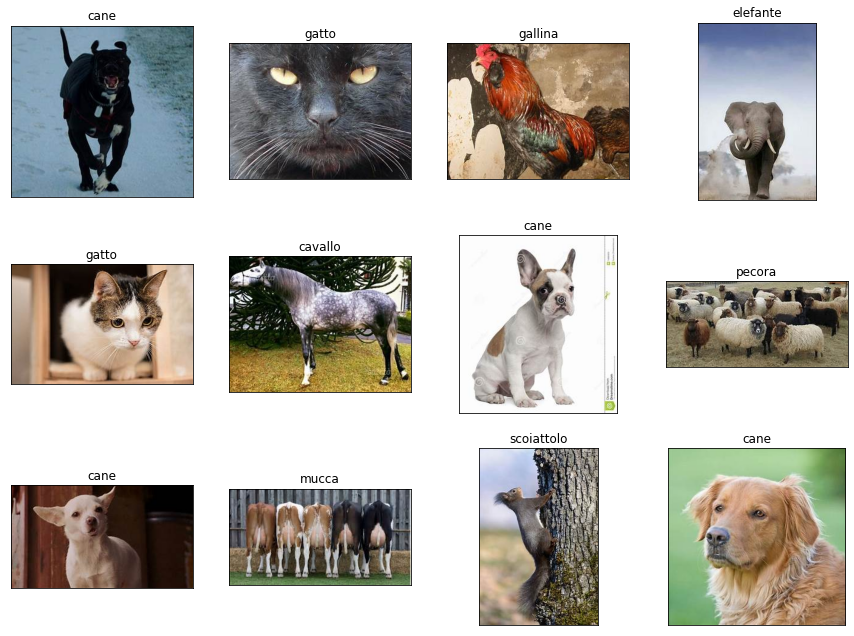

In [27]:
plot_df = train_df.sample(12).reset_index()
plt.figure(figsize=(15, 15))

for i in range(12):
    img_name = plot_df.loc[i, 'Filename']
    label_str = (plot_df.loc[i, 'ClassId'])
    plt.subplot(4,4,i+1)
    plt.imshow(plt.imread(os.path.join(train_path,label_str, img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])
    plt.yticks([])

# 5. Image Generator 만들기

In [28]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True)
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False)
val_generator = val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=32,shuffle=False)

Found 20938 images belonging to 10 classes.
Found 2627 images belonging to 10 classes.
Found 2614 images belonging to 10 classes.


# 6. Resnet 생성하기

## 6.1 Identity Block

In [29]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

# 6.2 Convolutional Block

In [30]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

## 6.3 ResNet50

In [31]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

## 6.4 model 만들기

In [32]:
base_model = ResNet50(input_shape=(224, 224, 3))

In [33]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 10,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [34]:
model = Model(inputs=base_model.input, outputs=headModel)
model.summary()

# model은 여기서 끝...

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

#  7. 전이 학습 준비

In [35]:
from tensorflow.keras.applications import ResNet50

modelT = ResNet50(
      input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet'
    )

In [36]:
for layers in modelT.layers:
    layers.trainable = False

In [37]:
from keras.layers import  Dropout
y = Flatten()(modelT.output)
y = Dropout(0.5)(y)
y = Dense(10, activation = "softmax")(y)

modelT = keras.Model(modelT.input, y)
modelT.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = "accuracy")
modelT.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [38]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [39]:
mc = ModelCheckpoint('./kaggle/working/model.h5', monitor='val_accuracy', mode='max' )

# 8. 학습

In [40]:
# History = modelT.fit_generator(train_generator,validation_data=val_generator,epochs=15,verbose=1, callbacks=[mc,es])

In [43]:
History = modelT.fit(train_generator,validation_data=val_generator,epochs=15,verbose=1, callbacks=[mc,es])

Epoch 1/15
655/655 [==============================] - 181s 275ms/step - loss: 4.5845 - accuracy: 0.9437 - val_loss: 8.7219 - val_accuracy: 0.9415
Epoch 2/15
655/655 [==============================] - 181s 276ms/step - loss: 5.0152 - accuracy: 0.9423 - val_loss: 9.8419 - val_accuracy: 0.9365
Epoch 3/15
655/655 [==============================] - 175s 267ms/step - loss: 4.5849 - accuracy: 0.9444 - val_loss: 9.8169 - val_accuracy: 0.9369
Epoch 4/15
655/655 [==============================] - 184s 281ms/step - loss: 4.7279 - accuracy: 0.9461 - val_loss: 8.5045 - val_accuracy: 0.9392
Epoch 5/15
655/655 [==============================] - 184s 282ms/step - loss: 4.4062 - accuracy: 0.9481 - val_loss: 9.2797 - val_accuracy: 0.9422
Epoch 6/15
655/655 [==============================] - 189s 288ms/step - loss: 4.7742 - accuracy: 0.9454 - val_loss: 9.7183 - val_accuracy: 0.9392
Epoch 7/15
655/655 [==============================] - 193s 294ms/step - loss: 4.6652 - accuracy: 0.9508 - val_loss: 9.5953 -

# 9. 그래프 출력

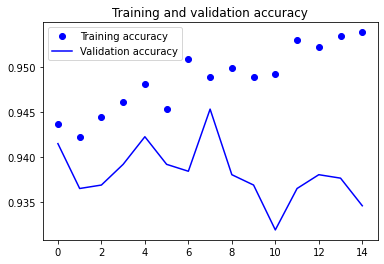

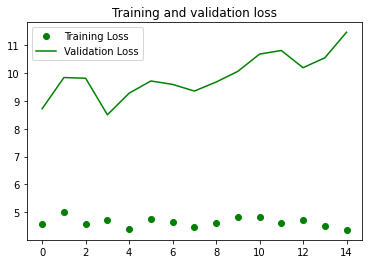

In [44]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 10. 예측하기

In [45]:
test_loss, test_acc = modelT.evaluate(test_generator, steps=len(test_generator), verbose=1)
print('Loss: %.3f' % (test_loss * 100.0))
print('Accuracy: %.3f' % (test_acc * 100.0)) 

83/83 [==============================] - 8s 90ms/step - loss: 9.9786 - accuracy: 0.9399
Loss: 997.861
Accuracy: 93.986


In [47]:
from sklearn.metrics import classification_report

In [48]:
y_val = test_generator.classes
y_pred = modelT.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)

In [49]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       487
           1       0.93      0.93      0.93       263
           2       0.99      0.95      0.97       146
           3       0.91      0.97      0.94       212
           4       0.97      0.96      0.97       311
           5       0.99      0.86      0.92       168
           6       0.84      0.93      0.88       188
           7       0.90      0.83      0.86       182
           8       0.99      0.96      0.98       483
           9       0.90      0.98      0.94       187

    accuracy                           0.94      2627
   macro avg       0.93      0.93      0.93      2627
weighted avg       0.94      0.94      0.94      2627



In [50]:
class_indices = test_generator.class_indices
indices = {v:k for k,v in class_indices.items()}

In [51]:
filenames = test_generator.filenames

In [52]:
val_df = pd.DataFrame()
val_df['filename'] = filenames
val_df['actual'] = y_val
val_df['predicted'] = y_pred
val_df['actual'] = val_df['actual'].apply(lambda x: indices[x])
val_df['predicted'] = val_df['predicted'].apply(lambda x: indices[x])
val_df.loc[val_df['actual']==val_df['predicted'],'Same'] = True
val_df.loc[val_df['actual']!=val_df['predicted'],'Same'] = False
val_df.head(10)

filename actual   predicted   Same
0  cane\OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg   cane        cane   True
1  cane\OIP--KlpwG173pm-gl9aWQkm9gHaE8.jpeg   cane        cane   True
2  cane\OIP--NBX8JVZ8wy9KtVr-cblGgHaJ4.jpeg   cane        cane   True
3  cane\OIP--OzHmoOBxcUQs7N3KjButwHaFP.jpeg   cane  scoiattolo  False
4  cane\OIP--PIzK8IjlJZpcxJWdgIn_wHaFj.jpeg   cane        cane   True
5  cane\OIP--RzOJndNB4Agj6qql-XvGAHaH7.jpeg   cane        cane   True
6  cane\OIP--cyBTQeGHK_bTaYGIDNn7AHaLE.jpeg   cane        cane   True
7  cane\OIP-00zvckpZ8XDEzk-Fv4HjkQHaGL.jpeg   cane        cane   True
8  cane\OIP-0B2H2VPu9neVWW7TtvJlPAAAAA.jpeg   cane        cane   True
9  cane\OIP-0ERf2k91vjSIq_POpXYImwHaFj.jpeg   cane        cane   True

In [53]:
val_df = val_df.sample(frac=1).reset_index(drop=True)

# 11. 예측비교하기

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
img_size = 224
def readImage(path):
    img = load_img(path,color_mode='rgb',target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.
    
    return img

def display_images(temp_df):
    temp_df = temp_df.reset_index(drop=True)
    plt.figure(figsize = (20 , 20))
    n = 0
    for i in range(15):
        n+=1
        plt.subplot(5 , 5, n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
        image = readImage(f"./dataset/{temp_df.filename[i]}")
        plt.imshow(image)
        plt.title(f'A: {temp_df.actual[i]} P: {temp_df.predicted[i]}')

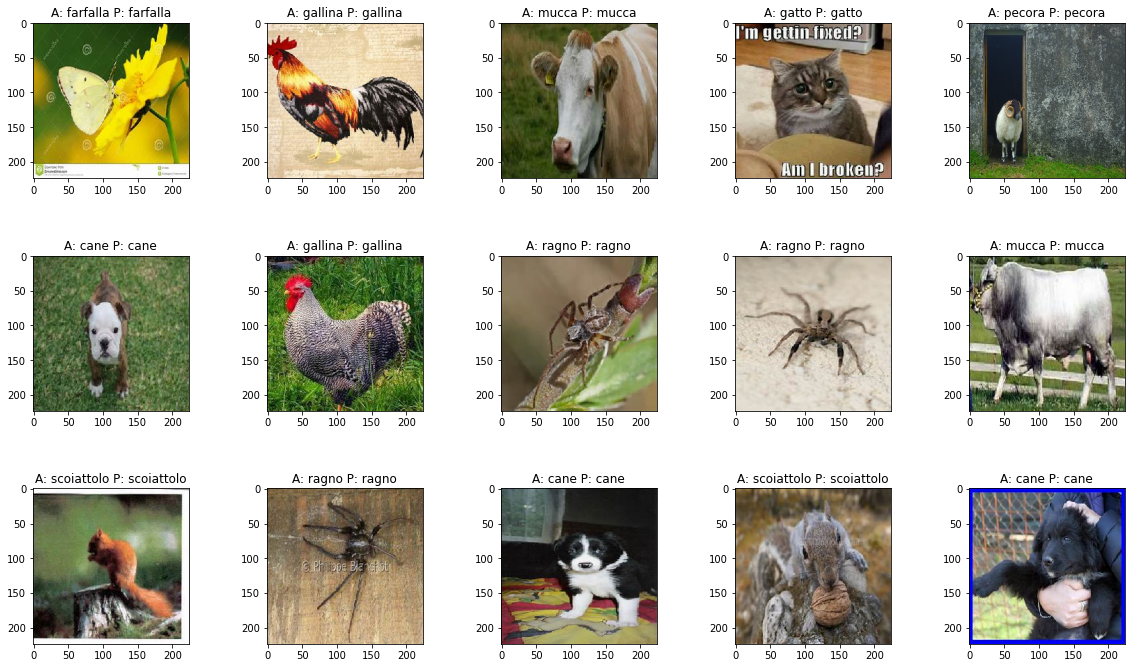

In [60]:
display_images(val_df[val_df['Same']==True])

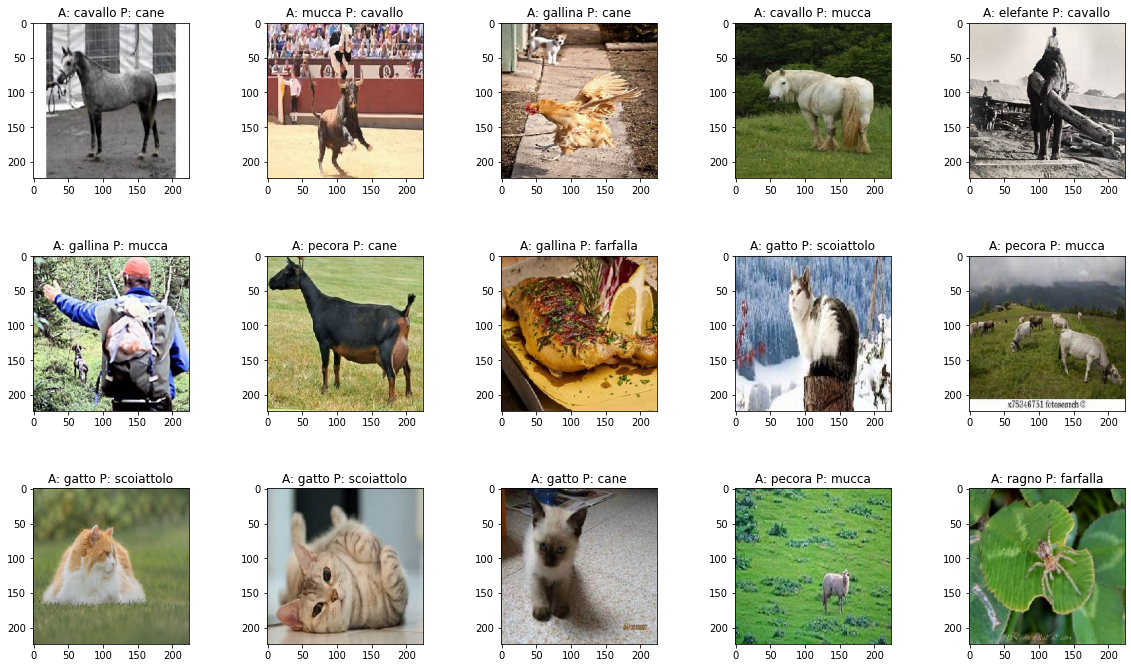

In [61]:
display_images(val_df[val_df['Same']!=True])

# 12. 매트릭스

In [62]:
cm = confusion_matrix(y_true=y_val, y_pred=y_pred)

In [63]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[464   5   0   0   4   0   7   3   0   4]
 [  6 244   0   2   0   0   8   3   0   0]
 [  2   2 138   0   0   0   3   1   0   0]
 [  1   0   0 206   0   0   0   0   4   1]
 [  4   1   0   4 298   0   2   0   1   1]
 [  8   1   1   1   0 145   0   2   0  10]
 [  1   5   0   0   1   0 174   7   0   0]
 [  8   3   1   1   3   1  13 151   0   1]
 [  1   1   0  12   0   0   0   1 465   3]
 [  0   1   0   1   0   1   0   0   0 184]]


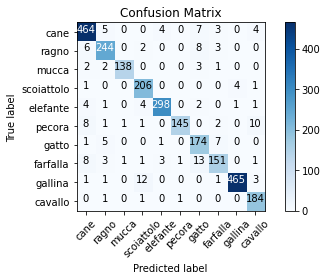

In [64]:
cm_plot_labels = ['cane', 'ragno', 'mucca', 'scoiattolo', 'elefante', 'pecora', 'gatto', 'farfalla', 'gallina', 'cavallo']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')